## Modeling

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('data1/data_under.csv')

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


As from our pervoius work we find out age, loan and month dont really signifiance over our target values so we can remove from our prediction 

In [8]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(df);

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,3,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,3,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'duration','campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

bank=df[columns]
y=df['y']

In [11]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,3,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,3,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bank, y, test_size = 0.25, random_state = 1234)

In [27]:
?LogisticRegression

In [15]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
model=logmodel.fit(x_train,y_train)

model.coef_

/home/nishant/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[ 0.01075637, -0.00126771,  0.01911454,  0.08805582, -0.02772345,
         0.01145589, -0.00410792, -0.04277413, -0.06446184,  0.02420248,
         0.0046076 , -0.06008326, -0.0016372 ,  0.01081888,  0.00863705,
        -0.2616144 ,  0.21387527,  0.04092387, -0.27772439, -0.00386693]])

In [28]:
logpr = model.predict(x_train)
logpred = model.predict(x_test)
logpred

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, logpred)

0.9075458871515976

Prediction Subscribe Result Show
[[8865  251]
 [ 701  480]]


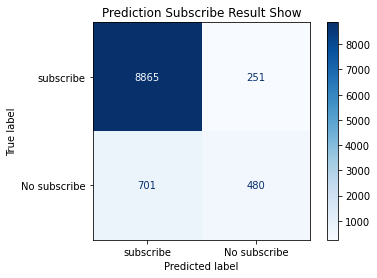

In [30]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(model, x_test, y_test,
                                 display_labels=['subscribe','No subscribe'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title("Prediction Subscribe Result Show")
print("Prediction Subscribe Result Show")
print(disp.confusion_matrix)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train_scale = sc_X.fit_transform(x_train)
x_test_scale = sc_X.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel1 = LogisticRegression() 
model=logmodel1.fit(x_train_scale,y_train)

In [33]:
logpr1 = model.predict(x_train)
logpred1 = model.predict(x_test)
logpred1

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
accuracy_score(y_test, logpred1)

0.8854035155870642

Prediction Subscribe Result Show
[[8868  248]
 [ 687  494]]


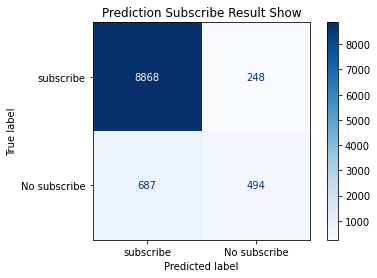

In [35]:
disp = plot_confusion_matrix(model, x_test_scale, y_test,
                                 display_labels=['subscribe','No subscribe'],
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title("Prediction Subscribe Result Show")
print("Prediction Subscribe Result Show")
print(disp.confusion_matrix)
plt.show()